<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задания" data-toc-modified-id="Задания-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задания</a></span><ul class="toc-item"><li><span><a href="#Написать-на-PyTorch-forward-и-backward-полносвязного-слоя-без-использования-autograd" data-toc-modified-id="Написать-на-PyTorch-forward-и-backward-полносвязного-слоя-без-использования-autograd-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Написать на PyTorch forward и backward полносвязного слоя без использования autograd</a></span></li><li><span><a href="#Написать-1-2-адаптивных-оптимизатора" data-toc-modified-id="Написать-1-2-адаптивных-оптимизатора-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Написать 1-2 адаптивных оптимизатора</a></span></li><li><span><a href="#Решить-задачу-нахождения-корней-квадратного-уравнения-методом-градиентного-спуска" data-toc-modified-id="Решить-задачу-нахождения-корней-квадратного-уравнения-методом-градиентного-спуска-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Решить задачу нахождения корней квадратного уравнения методом градиентного спуска</a></span></li></ul></li></ul></div>

# Задания

## Написать на PyTorch forward и backward полносвязного слоя без использования autograd

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import nn

In [2]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [ ]:

super().__init__()

In [22]:
class CustomLinear(nn.Module):
    def _init_(self, in_features, out_features, lr=0.1):
        super().__init__()
        self.shape = (in_features, out_features)
        self.lr = lr
        self.weight = np.zeros(self.shape, dtype=np.float32)
        self.bias = np.zeros((1, out_features), dtype=np.float32)
        self._clear_grads()
        
    def _clear_grads(self):
        self.inp = None
        self.activations = None
        self.d_sigma = None
        self.d_weight = None
        self.d_bias = None
        
    def forward(self, x):
        print('asdfasd')
        if len(x.shape) == 1:
            x = x.reshape(1, -1)
        self.inp = x
        self.activations = sigmoid(x.dot(self.weight) + self.bias)
        return self.activations
        
    
    def backward(self, grad):
        self.d_sigma = self.activations * (1 - self.activations)
        self.d_weight = self.grad_w(grad)
        self.d_bias = self.grad_b(grad)
        return self.grad_x(grad)
        
    def grad_w(self, grad):
        return grad * self.inp.T * self.d_sigma
    
    def grad_b(self, grad):
        return grad * self.d_sigma
    
    def grad_x(self, grad):
        return self.weight.dot(grad) * self.d_sigma
    
    def step(self):
        self.weight -= self.d_weight * self.lr
        self.bias -= self.d_bias * self.lr
        self._clear_grads()
        
model = CustomLinear()

## Написать 1-2 адаптивных оптимизатора

Оптимизатор из лекции

In [47]:
class SGDMomentum:
    
    def __init__(self, momentum, lr, model):
        self.model = model
        self.lr = lr
        self.momentum = momentum
        self.velocity = torch.zeros_like(model)
        
    def step(self, grad):
        self.velocity = self.momentum * self.velocity - self.lr * grad
        self.model += self.velocity

Оптимизатор Adam

https://medium.com/analytics-vidhya/a-complete-guide-to-adam-and-rmsprop-optimizer-75f4502d83be

https://miro.medium.com/max/1400/1*FnZxx-ssZXdTzIuuf1NEzw.png

In [16]:
class Adam:
    
    def __init__(self, model, a, 
                 m = 0,
                 v = 0,
                 t = 0,
                 b1 = 0.9, 
                 b2 = 0.999, 
                 eps = 10 ** (-8) ):
        self.model = model
        self.a = a
        self.m = m
        self.v = v
        self.t = t
        self.b1 = b1
        self.b2 = b2
        self.eps = eps
    
    def step(self, grad):
        self.t += 1
        self.m = self.b1 * self.m + (1 - self.b1) * grad
        self.v = self.b2 * self.v + (1 - self.b2) * grad
        m_bias = self.m / (1-self.b1)
        v_bias = self.v / (1-self.b2)
        self.model -= (self.a * m_bias) / (v_bias**0.5 + self.eps)

## Решить задачу нахождения корней квадратного уравнения методом градиентного спуска

Найти пересечения с осью x линии y = 2*x - 7 методом градиентного спуска (пример из лекции)

In [52]:
def func(x):
    return (2 * x - 7) ** 2

def grad_f(x):
    return 2 * (2 * x - 7) * 2

def solver(init_x):
    x = torch.tensor(init_x, dtype=torch.float32)
    g = grad_f(x)
    optim = SGDMomentum(0.9, 0.001, x)
    for i in range(1000):
        optim.step(g)
        g = grad_f(optim.model)
    print(optim.model)

solver(6)

tensor(3.5000)


Решение квадратных уравнений методом градиентного спуска
f(x) = -x^2 + 2x - 1

1 корень

x1 = 1

ветви направлены вниз

In [53]:
a, b, c = -1, 2, -1

f = lambda x: (a*x**2 + b*x + c)
g = lambda x: -(2*a*x + b) # знак "-" т.к. экстремум изначальной функции f в точке максимума а не минимума

def solver(init_x):
    x = torch.tensor(init_x, dtype=torch.float32)
    grad = g(x)
    optim = Adam(x, 0.01)
    for i in range(1000):
        optim.step(grad)
        grad = g(optim.model)
    print(optim.model)
    
solver(6)

tensor(1.0004)


f(x) = 2x^2 + 4x + 1

2 корня

x1 ≈ -1.7071 , x2 ≈ -0.29289

ветви направлены вверх

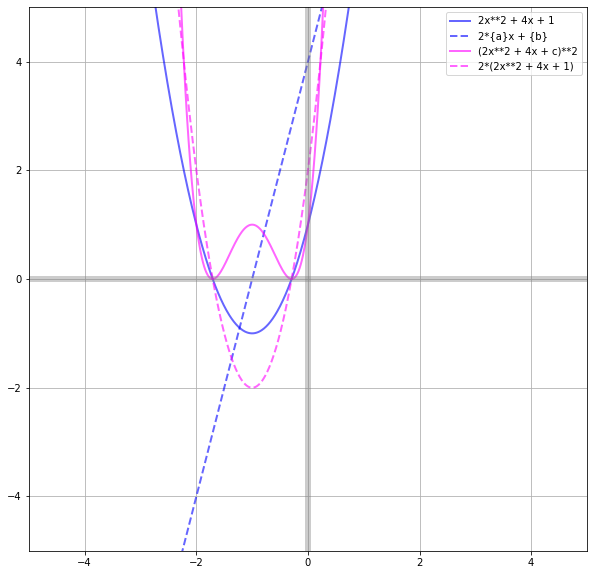

tensor(-1.0000)
tensor(-0.2929)


In [86]:
a, b, c = 2, 4, 1

f = lambda x: (a*x**2 + b*x + c)
g = lambda x: 2*a*x + b

f1 = lambda x: (a*x**2 + b*x + c)**2
g1 = lambda x: 2*(a*x**2 + b*x + c)

x = np.arange(-5, 5, 0.01)
plt.figure(figsize=[10,10])
plt.plot(x, [f(i) for i in x], color='blue',alpha=.6, linewidth=2, label=f'{a}x**2 + {b}x + {c}')
plt.plot(x, [g(i) for i in x], color='blue', alpha=.6, linewidth=2, linestyle=f'dashed', label='2*{a}x + {b}')
plt.plot(x, [f1(i) for i in x], color='magenta', alpha=.6, linewidth=2, label=f'({a}x**2 + {b}x + c)**2')
plt.plot(x, [g1(i) for i in x], color='magenta', alpha=.6, linewidth=2, linestyle='dashed', label=f'2*({a}x**2 + {b}x + {c})')
plt.plot(x, [0 for _ in x], color='gray', alpha=.4, linewidth=6)
plt.plot([0 for _ in x], x, color='gray', alpha=.4, linewidth=6)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(axis='both') 
plt.legend()
plt.show()

def solver(init_x, g):
    x = torch.tensor(init_x, dtype=torch.float32)
    grad = g(x)
    optim = Adam(x, 0.01)
    for i in range(2000):
        optim.step(grad)
        grad = g(optim.model)
    print(optim.model)
    
solver(6, g) # находит x-экстремума основной функции
solver(6, g1) # находит один из корней

т.к. 2 корня равноудалены от центра параболы, то их значения равны x(экстремума) +- расстояние до любого из них

In [145]:
extrem_x = -1.
diff = abs(extrem_x - (-0.2929))
first_root = extrem_x - diff
second_root = round(extrem_x + diff, 4)
print(f'корни уравнения - x1≈{first_root} x2≈{second_root}')

корни уравнения - x1≈-1.7071 x2≈-0.2929
